# Reconstructing an *off-axis* hologram by Fresnel Approximation

Reference: Digital holography and wavefront sensing by Ulf Schnars, Claas Falldorf, John Watson, and Werner Jüptner, Springer-verlag Berlin an, 2016. (Section 3.2)

## Info about the digital hologram:
'ulf7.BMP' is a digital hologram created by recording an object at about 1 meter distance with HeNe laser (632.8 nm) and an image sensor with 6.8 µm pixel size. 

In [1]:
#Import libraries realted to matplotlib and mathematical operations
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

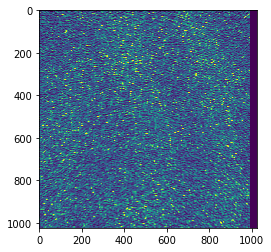

In [2]:
# Read the hologram image file
hologram = mpimg.imread('ulf7.BMP')
hologram = hologram.astype(float) #Convert into float type. Crucial for non integer based mathematical operations
# plot/view the hologram
imgplot = plt.imshow(hologram, cmap="viridis")

## Some equations from the relevant text from the book!
The Fresnel reonstruction field is given by the following relation (see section 3.2 of the book)
\begin{aligned} \Gamma(\xi, \eta)=& \frac{i}{\lambda d} \exp \left(-i \frac{2 \pi}{\lambda} d\right) \exp \left[-i \frac{\pi}{\lambda d}\left(\xi^{2}+\eta^{2}\right)\right] \times \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} E_{R}^{*}(x, y) h(x, y) \exp \left[-i \frac{\pi}{\lambda d}\left(x^{2}+y^{2}\right)\right] \exp \left[i \frac{2 \pi}{\lambda d}(x \xi+y \eta)\right] d x d y \end{aligned}
Or, in a digital form by
\begin{aligned} \Gamma(m, n)=& \frac{i}{\lambda d} \exp \left(-i \frac{2 \pi}{\lambda} d\right) \exp \left[-i \pi \lambda d\left(\frac{m^{2}}{N^{2} \Delta x^{2}}+\frac{n^{2}}{N^{2} \Delta y^{2}}\right)\right] \times \sum_{k=0}^{N-1} \sum_{l=0}^{N-1} E_{R}^{*}(k, l) h(k, l) \exp \left[-i \frac{\pi}{\lambda d}\left(k^{2} \Delta x^{2}+l^{2} \Delta y^{2}\right)\right] \exp \left[i 2 \pi\left(\frac{k m}{N}+\frac{l n}{N}\right)\right] \\ =& C \times \sum_{k=0}^{N-1} \sum_{l=0}^{N-1} E_{R}^{*}(k, l) h(k, l) \exp \left[-i \frac{\pi}{\lambda d}\left(k^{2} \Delta x^{2}+l^{2} \Delta y^{2}\right)\right] \exp \left[i 2 \pi\left(\frac{k m}{N}+\frac{l n}{N}\right)\right] \end{aligned}
where, $h(k,l)$ is the hologram, $N$ is number of pixels in camera sensor (assumed number of rows = number of columns, if not, convert the hologram in such a way prior to the operations), $\lambda$ is wavelength, $\Delta x$ and $\Delta y$ are horizontal and vertical distance of neighboring sensor pixels, and $d$ is the distance of reconstruction. It is easy to see that the last term under discrete integral is actually an IFT (inverse Fourier transform) of a multiple of hologram function and an exponential factor term. C is just a complex constant which does not affect the reconstruction process and $E_{R}^{*}(k, l)$ gets simplified to unity for a plane wave as reconstruction/recording wave.

In [3]:
# prepare the Fresnel operand for the hologram
Nr,Nc = np.shape(hologram) #number of rows and columns in the hologram
wavelength = 632.8e-9 #HeNe laser wavelength in SI units i.e. meters
dx = 6.8e-6 #sensor pixel size in meters
d = -1.054 #reconstruction distance in meters
Nr = np.linspace(0, Nr-1, Nr)-Nr/2
Nc = np.linspace(0, Nc-1, Nc)-Nc/2 
k, l = np.meshgrid(Nc,Nr)
factor = np.multiply(hologram, np.exp(-1j*np.pi/(wavelength*d)*(np.multiply(k, k)*dx**2 + np.multiply(l, l)*dx**2)))
reconstructed_field = np.fft.ifftshift(np.fft.ifft2(np.fft.ifftshift(factor))) # Take inverse Fourier transform of the factor

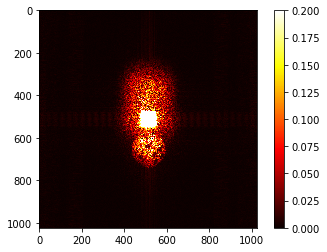

In [4]:
# save and plot 
I = np.abs(reconstructed_field)/np.max(np.abs(reconstructed_field)) #normalized intensity profile
plt.imshow(I, cmap="hot", clim=(0.0, 0.2))
plt.colorbar()
mpimg.imsave('fresnel_reconstruction.png', I, cmap="hot", vmin=0.0, vmax=0.3) #save reconstruction matrix as image